In [518]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import librosa

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [519]:
data_music = [None] * 2

data_music[0], sr = librosa.load('./Data/genres_original/blues/blues.00000.wav')
data_music[1], sr = librosa.load('./Data/genres_original/classical/classical.00000.wav')
# data_music[2], sr = librosa.load('./Data/genres_original/jazz/jazz.00000.wav')
# data_music[3], sr = librosa.load('./Data/genres_original/rock/rock.00000.wav')
# data_music[4], sr = librosa.load('./Data/genres_original/pop/pop.00000.wav')
# data_music[2], sr = librosa.load('./Data/genres_original/hiphop/hiphop.00000.wav')

In [520]:
# color = ['green', 'pink', 'skyblue', 'red']
# genre = ['Classical', 'Jazz', 'Metal', 'Rock']
color = ['skyblue', 'green', 'pink']
genre = ['Rock', 'Classical', 'Hiphop']

### Waveform Visualization

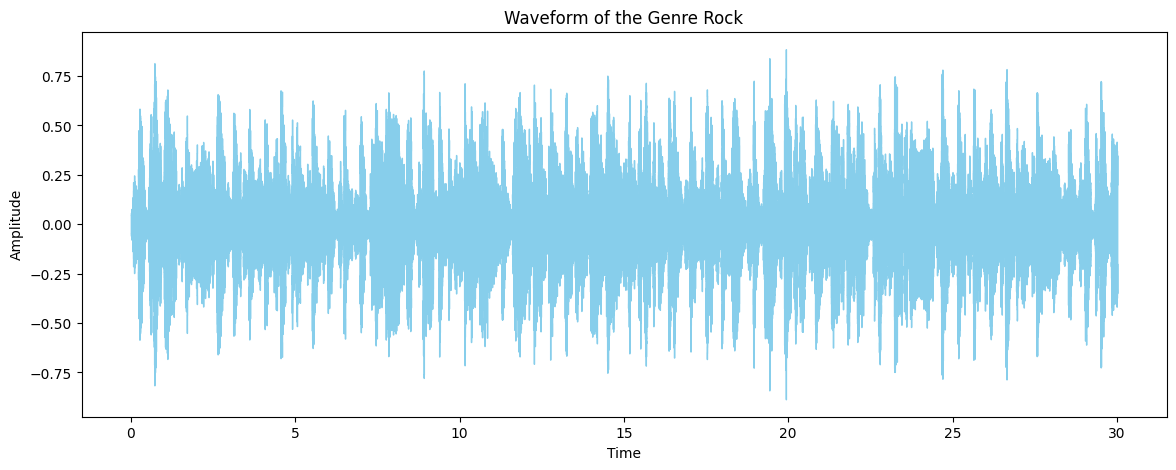

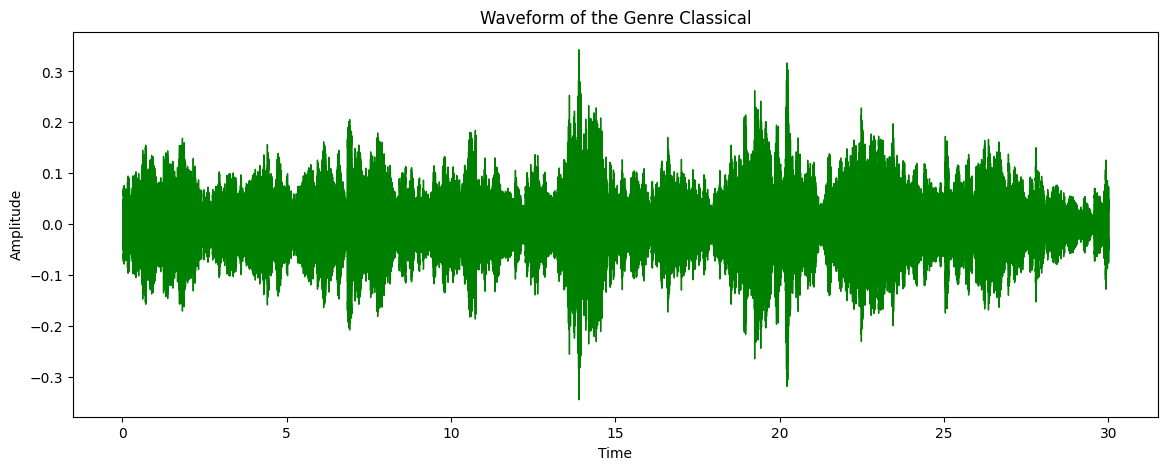

In [521]:
for i in range(0,len(data_music)) :
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(data_music[i], sr=sr, color=color[i])

    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Waveform of the Genre {genre[i]}')
    plt.show()

### Spectogram

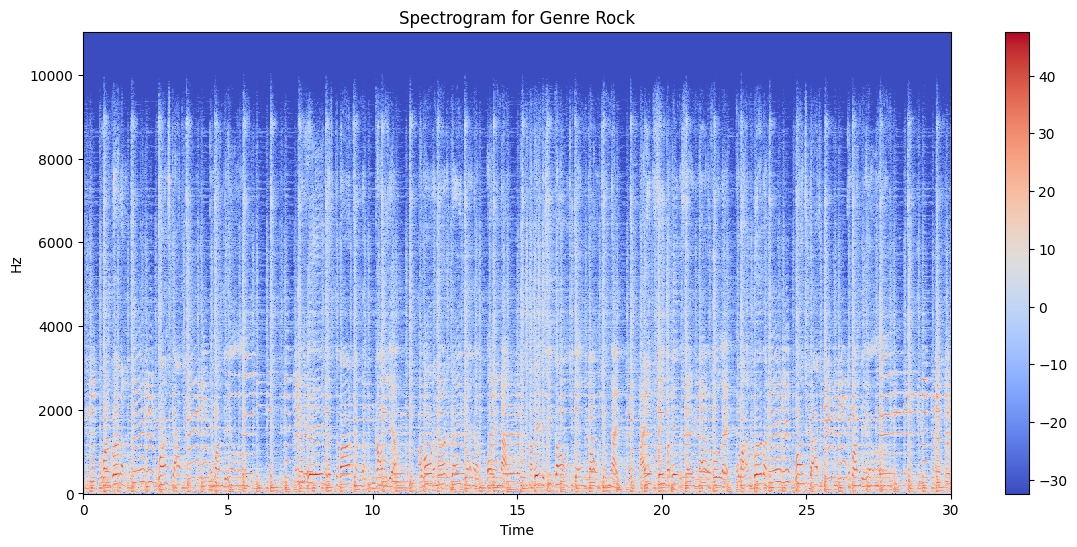

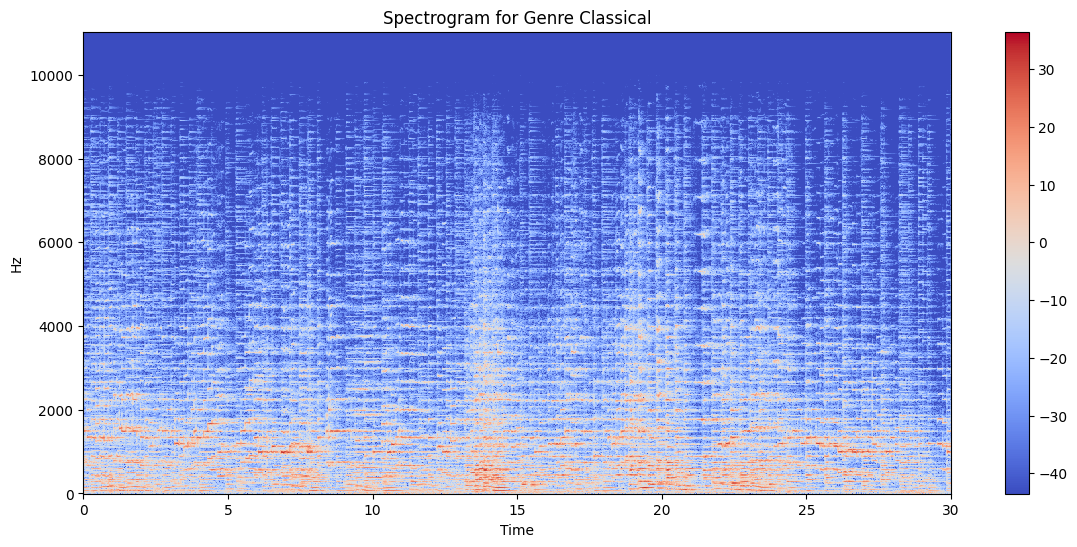

In [522]:
for i in range(0, len(data_music)) :
    stft = librosa.stft(data_music[i])
    stft_db = librosa.amplitude_to_db(abs(stft))
    plt.figure(figsize =(14, 6))
    librosa.display.specshow(stft_db, sr=sr, x_axis = 'time', y_axis = 'hz')
    plt.title(f'Spectrogram for Genre {genre[i]}')
    plt.colorbar()

### Spectral Rolloff

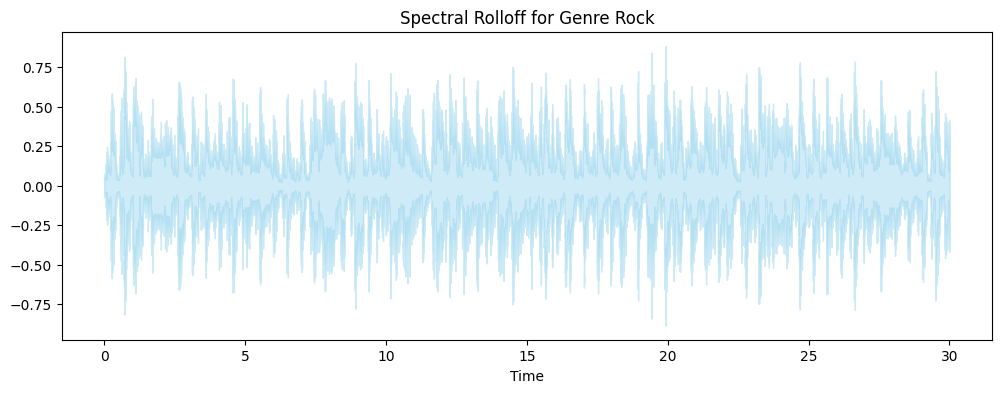

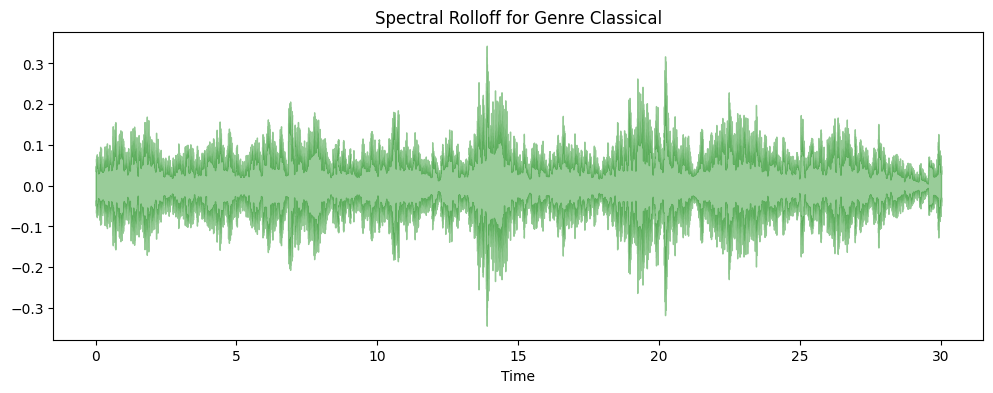

In [523]:
for i in range(0,len(data_music)) :
    spectral_rolloff = librosa.feature.spectral_rolloff(y = data_music[i], sr=sr)
    plt.figure(figsize = (12, 4))
    librosa.display.waveshow(data_music[i], sr=sr, alpha = 0.4, color=color[i])
    plt.title(f'Spectral Rolloff for Genre {genre[i]}')

### Chroma Feature

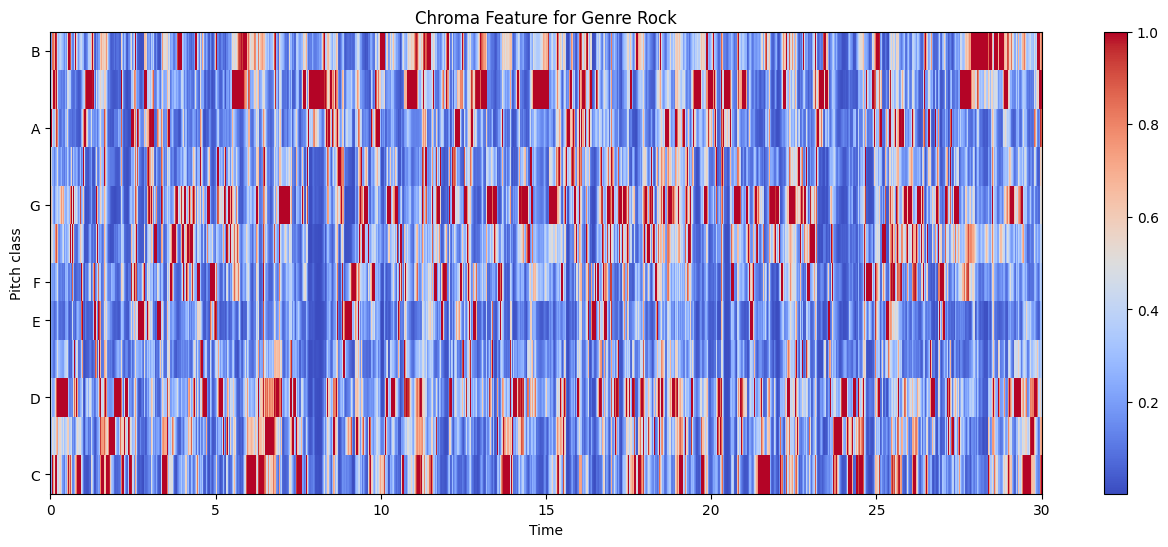

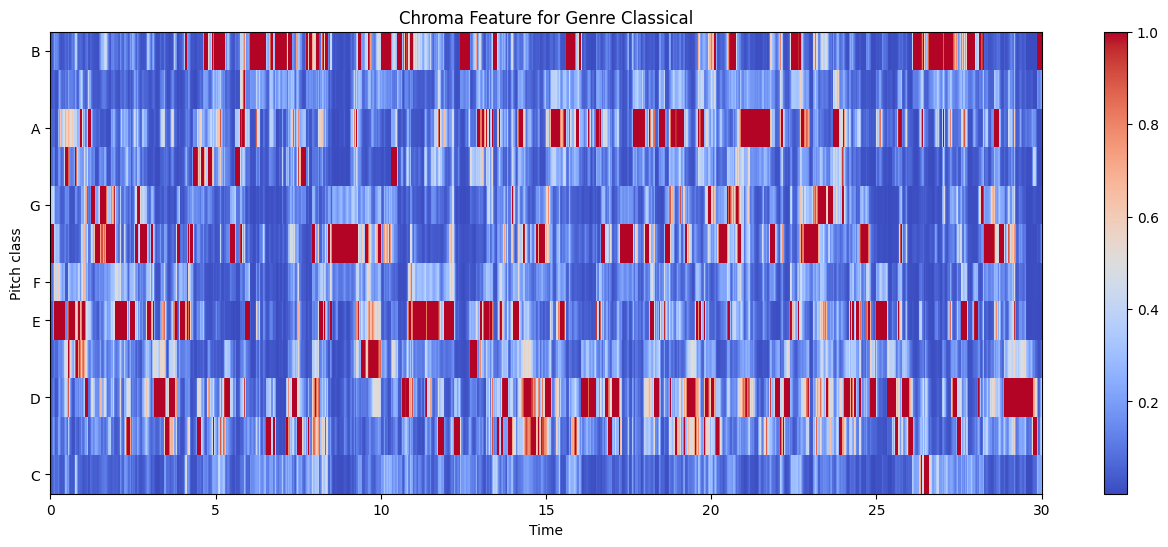

In [524]:
for i in range(0, len(data_music)) :
    chroma = librosa.feature.chroma_stft(y = data_music[i], sr = sr)
    plt.figure(figsize = (16,6))
    librosa.display.specshow(chroma, sr = sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.colorbar()
    plt.title(f'Chroma Feature for Genre {genre[i]}')
    plt.show()

### MFCC

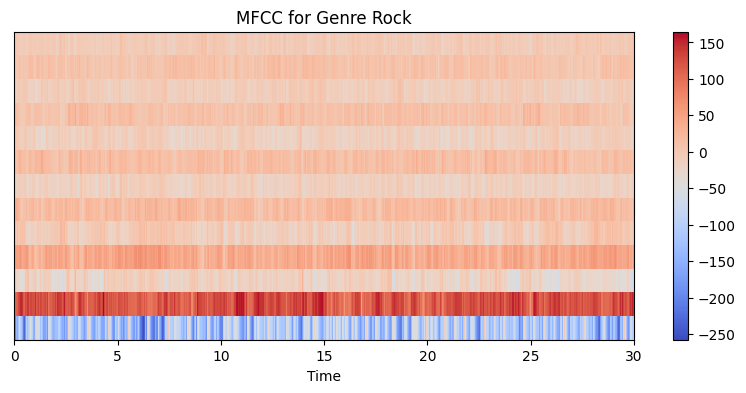

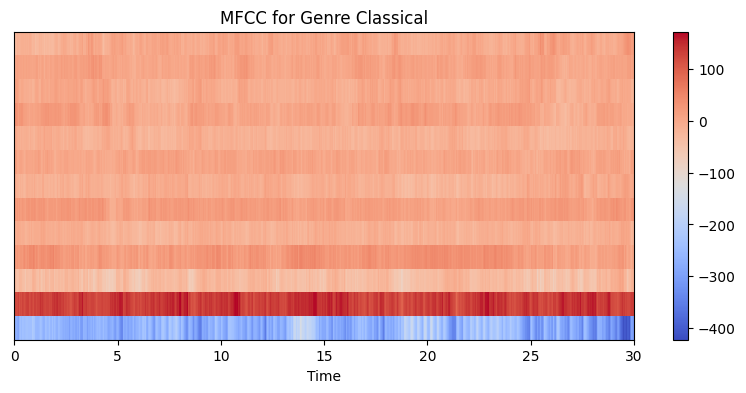

In [525]:
for i in range(0, len(data_music)) :
    mfccs = librosa.feature.mfcc(y=data_music[i], sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar()
    plt.title(f'MFCC for Genre {genre[i]}')
    plt.show()

### Zero Crossing Rate

The number of zero-crossing is :  21


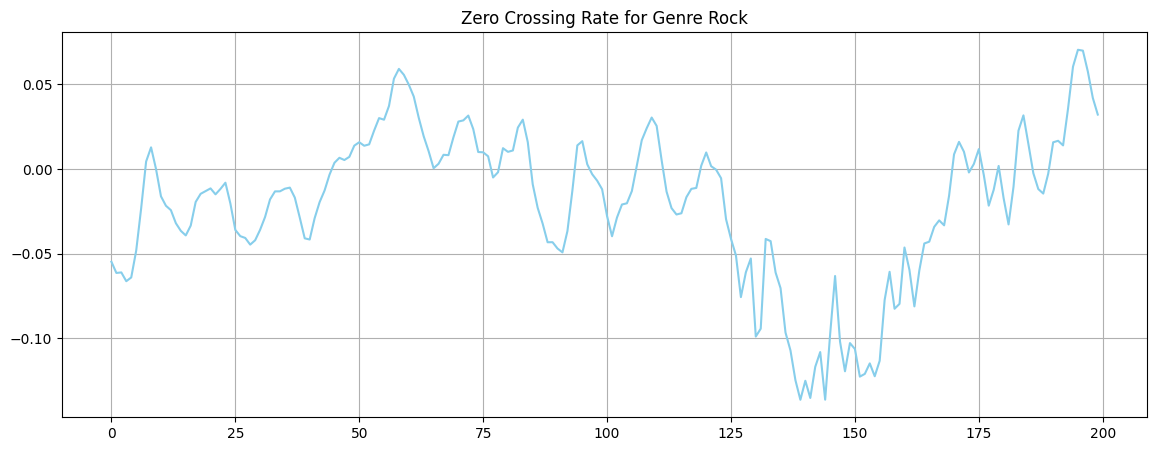

The number of zero-crossing is :  27


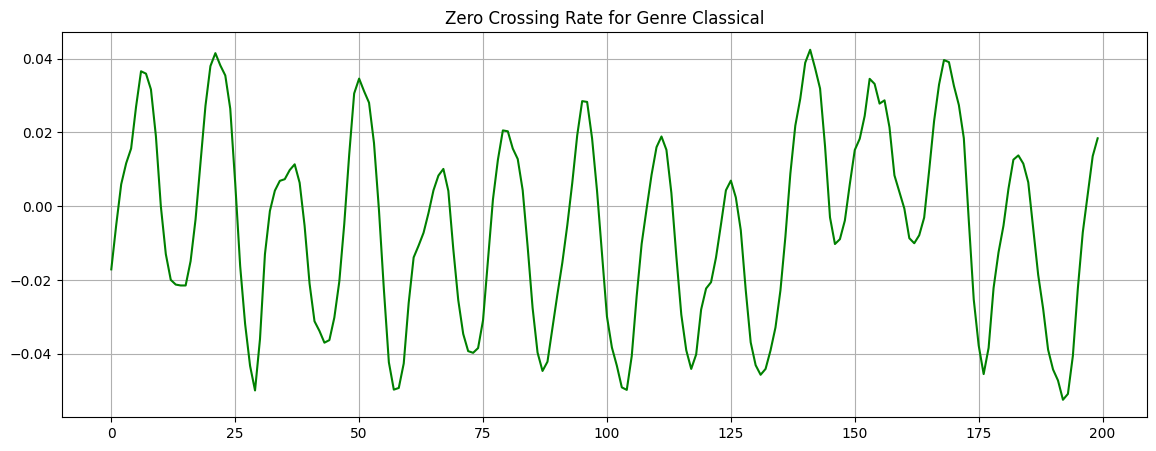

In [526]:
start = 1000
end = 1200
for i in range(0, len(data_music)) :
    plt.figure(figsize=(14,5))
    plt.plot(data_music[i][start:end], color=color[i])
    plt.title(f'Zero Crossing Rate for Genre {genre[i]}')
    plt.grid()

    zero_cross_rate = librosa.zero_crossings(data_music[i][start:end], pad=False)
    print("The number of zero-crossing is : ", sum(zero_cross_rate))
    plt.show()

### Data

In [527]:
# music_data = pd.read_csv('./Data/features_3_sec.csv')
music_data = pd.read_csv('./Data/features_30_sec.csv')

# music_data = music_data[music_data['label'].isin(list(map(lambda x: x.lower(),genre)))]
music_data = music_data.drop(music_data[~music_data['label'].isin(list(map(lambda x: x.lower(),genre)))].index)
music_data = music_data.drop(['filename','length'], axis=1)
music_data = music_data.drop_duplicates()

music_data = music_data.filter(regex=r'^(?!.*var).*$', axis=1)

music_data = music_data.reset_index(drop=True)

print(music_data['label'].value_counts())

# music_data.head()
music_data.groupby(['label']).head(2)

label
classical    100
rock         100
hiphop        98
Name: count, dtype: int64


,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,mfcc1_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,label
0,0.252392,0.036245,1505.166424,1559.005740,2716.306158,0.098223,-4.660241e-05,-0.000121,95.703125,-268.195526,...,8.258574,-1.335326,-0.365052,1.039341,3.791384,-0.320783,1.772985,0.889234,-0.842025,classical
1,0.214995,0.030625,1360.643672,1441.243134,2387.729130,0.087766,-5.125009e-05,-0.000090,112.347147,-324.061157,...,3.525355,5.048823,1.367479,3.010916,-3.128688,-4.289846,0.591009,2.877631,0.373281,classical
100,0.460728,0.125275,2667.940502,2351.160744,5475.312341,0.147309,-1.527371e-02,-0.002443,117.453835,-80.892197,...,11.498653,-10.729568,10.581861,-8.424021,7.323508,-5.377674,7.692775,-5.553035,1.516093,hiphop
101,0.457251,0.285521,2808.849567,2441.508002,5528.454222,0.097706,5.253005e-07,-0.000182,92.285156,-81.181618,...,12.753151,3.986501,13.241180,-2.367438,12.258653,-7.046246,4.735236,1.867201,0.030806,hiphop
198,0.387577,0.129127,1996.327664,2097.080528,4227.935352,0.090220,1.753432e-05,0.000067,123.046875,-116.604362,...,8.501457,-11.581522,2.199195,-6.184312,1.992846,-7.954800,2.088888,-2.400473,-1.545837,rock
199,0.365396,0.180470,1529.474961,1845.614892,3271.922752,0.054960,3.124393e-06,-0.000023,151.999081,-111.223877,...,9.934852,-4.673303,3.615292,-5.549787,3.358661,-4.949003,-1.478706,0.093757,-5.355480,rock


In [559]:
# Transforming Features
class_list = music_data.iloc[:, -1]
convertor = LabelEncoder()
y = convertor.fit_transform(class_list)

convertor.classes_

/home/bhavb/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/bhavb/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array(['classical', 'hiphop', 'rock'], dtype=object)

In [529]:
# Scaling of Features
fit = StandardScaler()
X = fit.fit_transform(np.array(music_data.iloc[:, :-1], dtype = float))

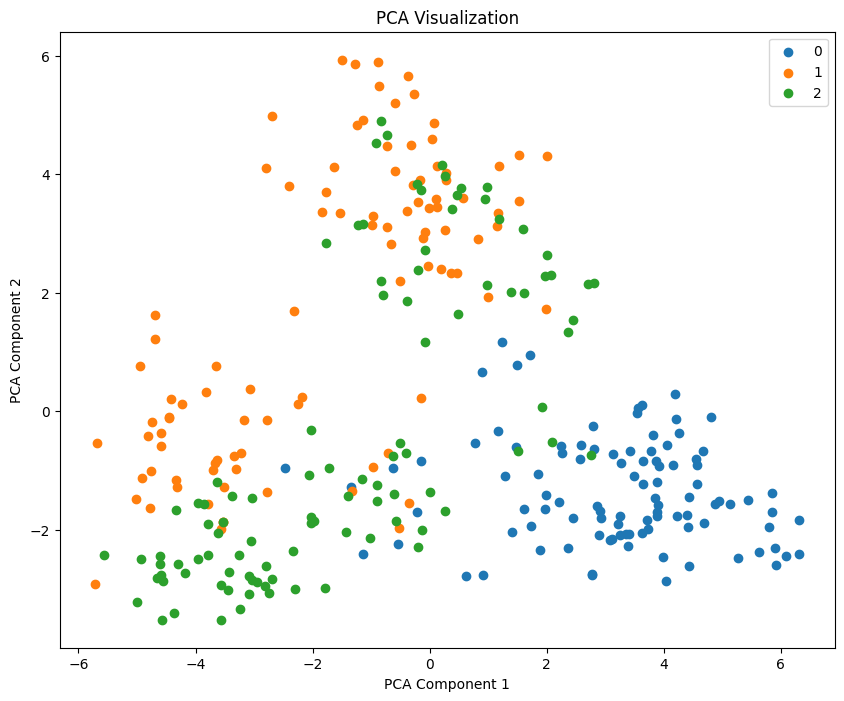

In [558]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

import matplotlib.pyplot as plt

# Create a scatter plot of the PCA components
plt.figure(figsize=(10, 8))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')
plt.legend()
plt.show()


In [530]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=3/17, random_state=1) 

### KNN

In [531]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate the classifier's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn * 100:.2f}%')

Accuracy: 82.22%


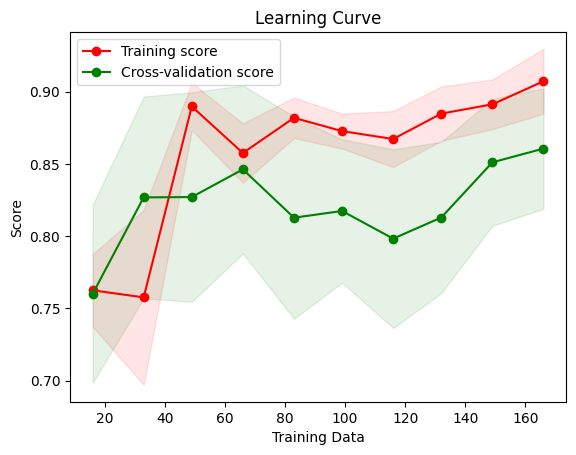

In [532]:
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Data")
plt.ylabel("Score")

plt.grid()

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [533]:
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan', 'cosine']}

In [534]:
gs = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
best_params = g_res.best_params_

print(best_params)

Fitting 3 folds for each of 56 candidates, totalling 168 fits
{'metric': 'cosine', 'n_neighbors': 5, 'weights': 'distance'}


In [535]:
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], metric=best_params['metric'])
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn * 100:.2f}%')

Accuracy: 86.67%


In [536]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ', accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.8666666666666667


### Decision Tree

In [537]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt * 100:.2f}%')

Accuracy: 77.78%


In [538]:
param_grid = {'criterion': ['gini', 'entropy'],
                'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
                'min_samples_split': [2, 4, 6, 8, 10, 12, 14]}

# gs = GridSearchCV(dt, param_grid, cv=3, n_jobs=-1)
# g_res = gs.fit(X_train, y_train)
# best_params = g_res.best_params_

best_params = {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 2}

In [539]:
dt = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'])
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt * 100:.2f}%')

Accuracy: 75.56%


### MLP Classifier

In [540]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 75), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluate the classifier's performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy: {accuracy_mlp * 100:.2f}%')


Accuracy: 91.11%


/home/bhavb/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [541]:
param_grid = {
    'hidden_layer_sizes': [(100, 75), (100, 50), (150, 90)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000, 2000]
    }

# gs = GridSearchCV(mlp, param_grid, verbose = 1, cv=3, n_jobs = -1)
# g_res = gs.fit(X_train, y_train)
# best_params = g_res.best_params_

best_params = {'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (150, 90),
 'learning_rate': 'constant',
 'max_iter': 2000,
 'solver': 'sgd'}



In [542]:
mlp = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'], activation=best_params['activation'], solver=best_params['solver'], alpha=best_params['alpha'], learning_rate=best_params['learning_rate'], max_iter=best_params['max_iter'])
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluate the classifier's performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy: {accuracy_mlp * 100:.2f}%')


Accuracy: 93.33%


### Random Forest

In [543]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier class
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Evaluate the classifier's performance
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'Accuracy: {accuracy_rfc * 100:.2f}%')


Accuracy: 84.44%


In [544]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# grid_search = GridSearchCV(rfc, param_grid, verbose=1, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

print(best_params)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [545]:
rfc = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'])
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'Accuracy: {accuracy_rfc * 100:.2f}%')

Accuracy: 82.22%


### Prediction

In [546]:
def calculate_features(filename):
    y, sr = librosa.load(filename)

    # Chroma feature
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = np.mean(chroma_stft)
    chroma_stft_var = np.var(chroma_stft)

    # RMS energy
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_var = np.var(rms)

    # Spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroid)
    spectral_centroid_var = np.var(spectral_centroid)

    # Spectral bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_bandwidth_mean = np.mean(spectral_bandwidth)
    spectral_bandwidth_var = np.var(spectral_bandwidth)

    # Spectral rolloff
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = np.mean(rolloff)
    rolloff_var = np.var(rolloff)

    # Zero crossing rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_var = np.var(zero_crossing_rate)

    # Harmonic-to-percussive ratio
    harmonic, percussive = librosa.effects.hpss(y)
    harmony_mean = np.mean(harmonic)
    harmony_var = np.var(harmonic)
    perceptr_mean = np.mean(percussive)
    perceptr_var = np.var(percussive)

    # Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # MFCCs (13 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_var = np.var(mfccs, axis=1)

    # Combine all the features into a single list
    features = [
        chroma_stft_mean, chroma_stft_var, rms_mean, rms_var,
        spectral_centroid_mean, spectral_centroid_var,
        spectral_bandwidth_mean, spectral_bandwidth_var,
        rolloff_mean, rolloff_var,
        zero_crossing_rate_mean, zero_crossing_rate_var,
        harmony_mean, harmony_var, perceptr_mean, perceptr_var,
        tempo
    ]

    for i in range(20):
        features.append(mfccs_mean[i])
        features.append(mfccs_var[i])

    return np.array(features)


In [547]:
def calculate_features1(filename):
    y, sr = librosa.load(filename)

    # Chroma feature
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = np.mean(chroma_stft)

    # RMS energy
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)

    # Spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroid)

    # Spectral bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_bandwidth_mean = np.mean(spectral_bandwidth)

    # Spectral rolloff
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = np.mean(rolloff)

    # Zero crossing rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)

    # Harmonic-to-percussive ratio
    harmonic, percussive = librosa.effects.hpss(y)
    harmony_mean = np.mean(harmonic)
    perceptr_mean = np.mean(percussive)

    # Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # MFCCs (13 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Combine all the features into a single list
    features = [
        chroma_stft_mean,
        rms_mean,
        spectral_centroid_mean,
        spectral_bandwidth_mean,
        rolloff_mean,
        zero_crossing_rate_mean,
        harmony_mean,
        perceptr_mean,
        tempo
    ]

    for i in range(20):
        features.append(mfccs_mean[i])
    
    return np.array(features)


In [584]:
prediction_filename = './Data/genres_original/classical/classical.00001.wav'
prediction_filename = '../ckpt2/output_classic_lstm.wav'

In [585]:
features = calculate_features1(prediction_filename)

In [586]:
predict = knn.predict([features, ])
print(predict)
print(convertor.inverse_transform(predict))

[1]
['hiphop']


In [587]:
predict = rfc.predict([features, ])
print(predict)
print(convertor.inverse_transform(predict))

[2]
['rock']


In [588]:
predict = mlp.predict([features, ])
print(predict)
print(convertor.inverse_transform(predict))

[1]
['hiphop']


In [589]:
predict = dt.predict([features, ])
print(predict)
print(convertor.inverse_transform(predict))

[2]
['rock']


In [590]:
music_data.columns

Index(['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean',
       'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean',
       'harmony_mean', 'perceptr_mean', 'tempo', 'mfcc1_mean', 'mfcc2_mean',
       'mfcc3_mean', 'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean',
       'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean',
       'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean', 'label'],
      dtype='object')

In [591]:
dt.feature_importances_

array([0.58047373, 0.04552885, 0.        , 0.05671349, 0.        ,
       0.00836511, 0.        , 0.03872846, 0.        , 0.04203944,
       0.02140212, 0.05665914, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02242981, 0.00607293,
       0.01257615, 0.03610832, 0.0519612 , 0.        , 0.        ,
       0.02094126, 0.        , 0.        , 0.        ])

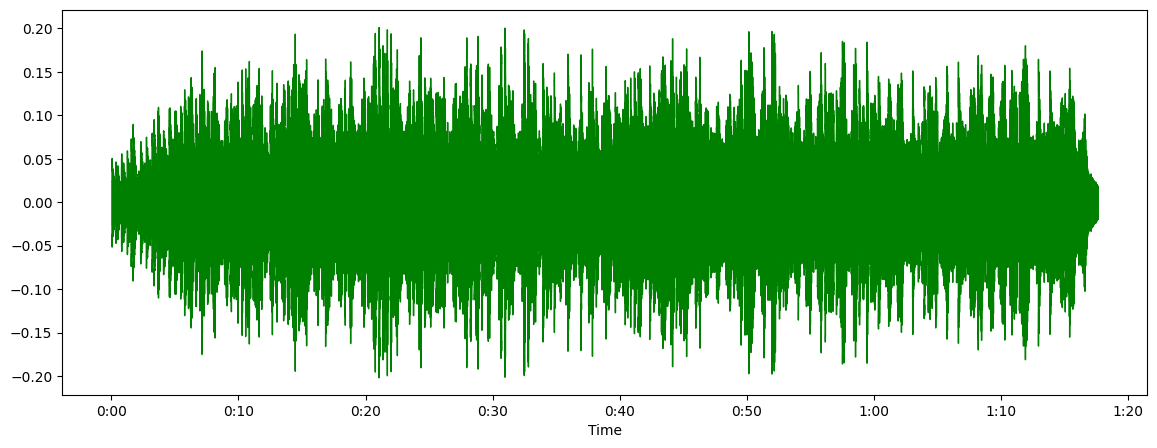

In [592]:
# Print waveform of the audio file

data_music, sr = librosa.load(prediction_filename)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data_music, sr=sr, color='green')
plt.show()

The number of zero-crossing is :  11


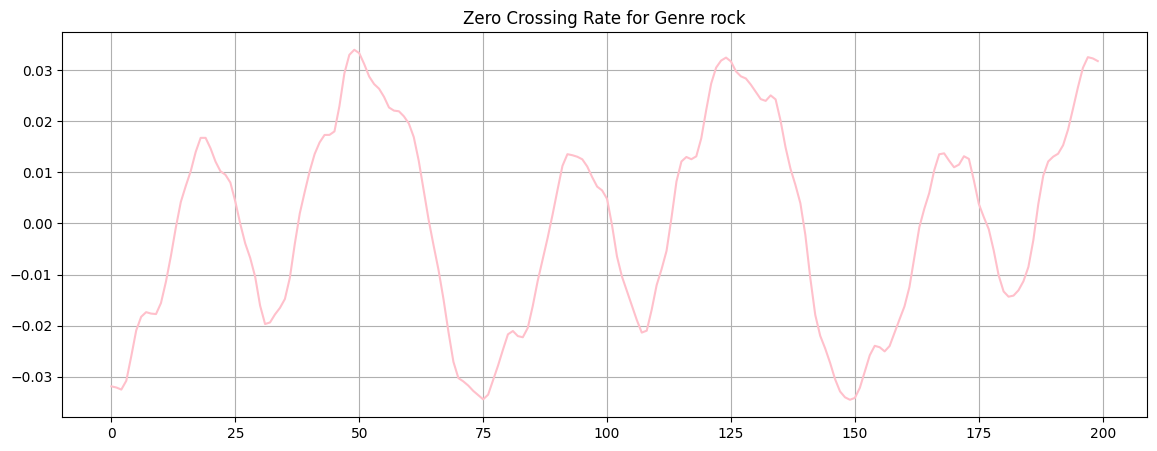

In [593]:
plt.figure(figsize=(14,5))
plt.plot(data_music[start:end], color=color[predict[0]])
plt.title(f'Zero Crossing Rate for Genre {convertor.inverse_transform(predict)[0]}')
plt.grid()

zero_cross_rate = librosa.zero_crossings(data_music[start:end], pad=False)
print("The number of zero-crossing is : ", sum(zero_cross_rate))
plt.show()

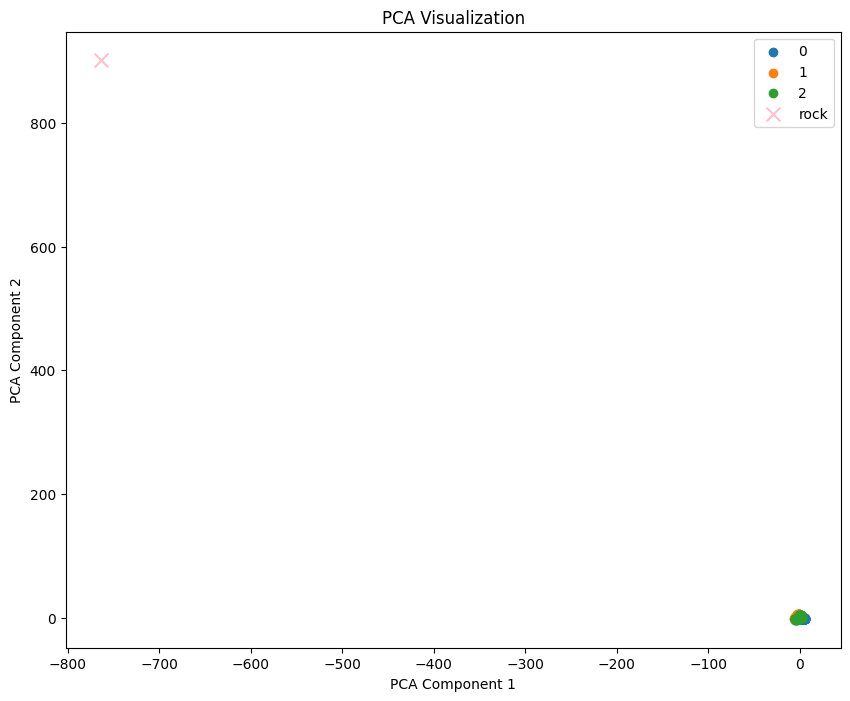

In [594]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X1_pca=pca.transform(features.reshape(1,-1))

import matplotlib.pyplot as plt

# Create a scatter plot of the PCA components
plt.figure(figsize=(10, 8))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)

# Plot X1_pca - having only a single element
plt.scatter(X1_pca[0,0], X1_pca[0,1], color=color[predict[0]], marker='x', s=100, label=convertor.inverse_transform(predict)[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')
plt.legend()
plt.show()
